### Some analytical features that are observed on Udemy / Unacademy / ebay or any other E-learning platforms.
1. Categorizing or sub-categorizing the products offered
2. Personal recommendation System - Suggesting the next product the user likely to buy
3. Number of users registered till now, ratings of the courses and "bestseller" tag
4. Attractive Graphical User Interface, to sort the products according to the user


Lets Analyze first that how recommender system works in such fields.

Basically two techniques are mainly used for learning a model in recommendation system
1. Content based filtering.

Lets say if user1 buys a course in the following order.
- Course on a basic programming knowledge
- Introduction and Application of high level languages
- Data analysis and interpretation

so from the above queue it is likely to suggest the same order of courses to another user.

2. Collaborative based filtering.

This is mostly based on behavior of the user and is most widely used and seen in online selling apps like flipcart.
For Ex. if you buy a phone from flipcart, it would more likely to suggest you to buy headphones also. This is basedon the data analysis from all the previous customers who purchased that phone.


### Objective - Lets say our objective is to suggest user a new course based on the ratings. 

Dataset = http://www2.informatik.uni-freiburg.de/~cziegler/BX/
#### Importing relevant libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

In [2]:
books=pd.read_csv(r'C:\Users\aa\OneDrive\Documents\Intern\BX-Books.csv',sep=';',error_bad_lines = False, encoding = 'latin -1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\aa\Anaconda3_2020\lib\site-packages\IPython\core\interactiveshell

In [3]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
arr = np.array(books['Book-Title'])
'Introduction to Python Programming' in arr # this bookk is not present in this dataframe

False

In [5]:
print(books.shape)
books.columns

(271360, 8)


Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [6]:
users=pd.read_csv(r'C:\Users\aa\OneDrive\Documents\Intern\BX-Users.csv',sep=';',error_bad_lines = False, encoding = 'latin -1')

In [7]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
print(users.shape)
users.columns

(278858, 3)


Index(['User-ID', 'Location', 'Age'], dtype='object')

In [9]:
users.Age.isna().value_counts()  # counting null values

False    168096
True     110762
Name: Age, dtype: int64

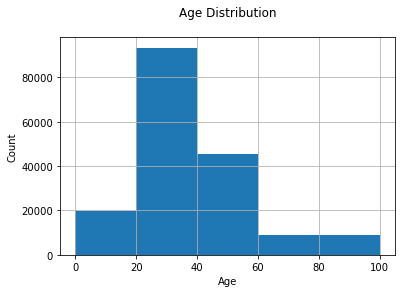

In [10]:
users.Age.hist(bins=[0,20,40,60,100])
plt.title('Age Distribution\n')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

So we can say that peoples between 20 to 40 age group, have taken many courses and given ratings

In [11]:
ratings=pd.read_csv(r'C:\Users\aa\OneDrive\Documents\Intern\BX-Book-Ratings.csv',sep=';',error_bad_lines = False, encoding = 'latin -1')

In [12]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
print(ratings.shape)
ratings.columns

(1149780, 3)


Index(['User-ID', 'ISBN', 'Book-Rating'], dtype='object')

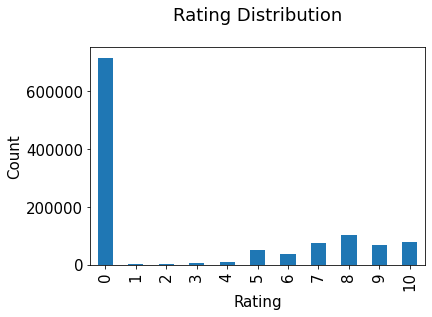

In [14]:
plt.rc("font", size=15)
ratings['Book-Rating'].value_counts(sort=False).plot(kind='bar')
plt.title('Rating Distribution\n')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

### Recommendation based on rating counts

In [15]:
rating_count = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
top_rated_books = rating_count.sort_values('Book-Rating', ascending=False).head()
top_rated_books

,Book-Rating
ISBN,
0971880107,2502
0316666343,1295
0385504209,883
0060928336,732
0312195516,723


So we find out the top 5 books having highest registered customer ratings. Let us find out what are this books are about

In [16]:
most_rated_books = pd.DataFrame(np.array(top_rated_books.index), index=np.arange(5), columns = ['ISBN'])
most_rated_books_summary = pd.merge(most_rated_books, books, on='ISBN')
most_rated_books_summary

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown",http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...,http://images.amazon.com/images/P/0316666343.0...
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...,http://images.amazon.com/images/P/0385504209.0...
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...,http://images.amazon.com/images/P/0060928336.0...
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...,http://images.amazon.com/images/P/0312195516.0...


From above we can say that, by implementing such recommender system, the book with with most rating counts will be suggested.

But it might have some drawbacks.Lets find out the average ratings of each book.

In [17]:
average_rating = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].mean())
average_rating['ratingCount'] = pd.DataFrame(ratings.groupby('ISBN')['Book-Rating'].count())
average_rating.sort_values('ratingCount', ascending=False).head()


,Book-Rating,ratingCount
ISBN,,
0971880107,1.019584,2502
0316666343,4.468726,1295
0385504209,4.652322,883
0060928336,3.448087,732
0312195516,4.334716,723


#### Observations: 
In this data set, the book that received the most rating counts was not highly rated at all. As a result, if we were to use recommendations based on rating counts, we would definitely make mistakes here. So, we need to have a better system.

We have to take accountable users.

1. who have read sufficient number of books (say>300)
2. The books which are rated significant number of times (say>100)

In [18]:
count_user = ratings['User-ID'].value_counts()
ratings = ratings[ratings['User-ID'].isin(count_user[count_user >= 300].index)]
count_rating = ratings['Book-Rating'].value_counts()
ratings = ratings[ratings['Book-Rating'].isin(count_rating[count_rating >= 100].index)]

#### Rating Matrix

Shows 2D view of the required data. This is because every user does not rated every book

In [19]:
ratings_pivot = ratings.pivot(index='User-ID',columns='ISBN')['Book-Rating']
UserId = ratings_pivot.index
ISBN = ratings_pivot.columns
print(ratings_pivot.shape)
ratings_pivot.head()

(561, 187297)


ISBN,0375404120,9022906116,*0515128325,+0451197399,0 00 612183 7,0 00 614494 2,0 7336 1053 6,0 907 062 008,0*708880258,0.330241664,...,THEFLYINGACE,X000000000,"YOUTELLEM,AND",ZR903CX0003,"\0432534220\""""","\2842053052\""""",b00005wz75,cn108465,cn113107,Ô½crosoft
User-ID,,,,,,,,,,,,,,,,,,,,,
254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3757,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
Book_name = input() #np.random.choice(books['Book-Title'])               # GETS INPUT OF THE BOOK THAT YOU RECENTLY VISITED/READ
Input_ISBN = books.loc[books['Book-Title']==Book_name,'ISBN'].iloc[0]
print(Book_name)

Wild Animus
Wild Animus


In [26]:
Input_ISBN in ISBN
#ISBN

True

In [27]:
Input_Book_rating = ratings_pivot[Input_ISBN]
#Input_Book_rating
similar_to_book = ratings_pivot.corrwith(Input_Book_rating)
similar_to_book

C:\Users\aa\Anaconda3_2020\lib\site-packages\numpy\lib\function_base.py:2551: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\aa\Anaconda3_2020\lib\site-packages\numpy\lib\function_base.py:2480: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


ISBN
 0375404120      NaN
 9022906116      NaN
*0515128325      NaN
+0451197399      NaN
0 00 612183 7    NaN
                  ..
\2842053052\""   NaN
b00005wz75       NaN
cn108465         NaN
cn113107         NaN
Ô½crosoft        NaN
Length: 187297, dtype: float64

In [29]:
corr_book = pd.DataFrame(similar_to_book, columns=['pearsonR'])
#corr_book
corr_book.dropna(inplace=True)
#corr_book
corr_summary = corr_book.join(average_rating['ratingCount'])
#corr_summary
ISBN_corr = corr_summary[corr_summary['ratingCount']>=100].sort_values('pearsonR', ascending=False).head(10)
print(ISBN_corr.shape)
ISBN_corr

(10, 2)


,pearsonR,ratingCount
ISBN,,
0684833395,1.000000,108
0688177859,1.000000,108
0425180964,1.000000,132
0425189864,1.000000,100
0971880107,1.000000,2502
0375727132,1.000000,124
0451204530,0.990352,109
0446611778,0.986195,125
0373218192,0.986165,123


#### If the data is empty it suggests that the recommending books have probably rating count less than 100 

So we have found out the ISBN numbers of the top 10 books which are correlated to what we read. Let us try to found out the names of the book.

In [30]:
arr2 = np.array(ISBN_corr.index)
books_corr_to_Input_Book = pd.DataFrame(arr2[1:len(arr2)+1],index=np.arange(len(arr2)-1), columns=['ISBN'])
corr_books = pd.merge(books_corr_to_Input_Book,books,on='ISBN')
corr_books
#type(np.array(ISBN_corr.index))

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0688177859,"Ahab's Wife: Or, The Star-Gazer: A Novel",Sena Jeter Naslund,2000,Perennial,http://images.amazon.com/images/P/0688177859.0...,http://images.amazon.com/images/P/0688177859.0...,http://images.amazon.com/images/P/0688177859.0...
1,0425180964,The Bear and the Dragon (Jack Ryan Novels),Tom Clancy,2001,Berkley Publishing Group,http://images.amazon.com/images/P/0425180964.0...,http://images.amazon.com/images/P/0425180964.0...,http://images.amazon.com/images/P/0425180964.0...
2,0425189864,Mortal Prey,John Sandford,2003,Berkley Publishing Group,http://images.amazon.com/images/P/0425189864.0...,http://images.amazon.com/images/P/0425189864.0...,http://images.amazon.com/images/P/0425189864.0...
3,0971880107,Wild Animus,Rich Shapero,2004,Too Far,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...,http://images.amazon.com/images/P/0971880107.0...
4,0375727132,The Dive From Clausen's Pier : A Novel (Vintag...,ANN PACKER,2003,Vintage,http://images.amazon.com/images/P/0375727132.0...,http://images.amazon.com/images/P/0375727132.0...,http://images.amazon.com/images/P/0375727132.0...
5,0451204530,Code to Zero,Ken Follett,2001,Signet Book,http://images.amazon.com/images/P/0451204530.0...,http://images.amazon.com/images/P/0451204530.0...,http://images.amazon.com/images/P/0451204530.0...
6,0446611778,Last Man Standing,David Baldacci,2002,Warner Vision,http://images.amazon.com/images/P/0446611778.0...,http://images.amazon.com/images/P/0446611778.0...,http://images.amazon.com/images/P/0446611778.0...
7,0373218192,Engaging The Enemy,Nora Roberts,2003,Silhouette,http://images.amazon.com/images/P/0373218192.0...,http://images.amazon.com/images/P/0373218192.0...,http://images.amazon.com/images/P/0373218192.0...
8,0446609323,Black Friday,James Patterson,1989,Warner Vision,http://images.amazon.com/images/P/0446609323.0...,http://images.amazon.com/images/P/0446609323.0...,http://images.amazon.com/images/P/0446609323.0...


Above are the correlated books with the Book that we read (here Acceptable Risk). So these recommendation system suggests the 1st book in the above column for the reader to read next, based on the ratings given bythe people.

#### Change in INPUT BOOK give you the recommendation of various books.

## 2. Collaborative Filtering

### Objective 2 :- Recommending books based on the behaviour of the user.
1. Find clusturs of similar users using common bokk ratings
2. Take average rating of top k-nearest neighbours and make predictions

In [31]:
combine_book_rating = pd.merge(ratings, books, on='ISBN')
columns = ['Year-Of-Publication', 'Publisher', 'Book-Author', 'Image-URL-S', 'Image-URL-M', 'Image-URL-L']
combine_book_rating = combine_book_rating.drop(columns, axis=1)
print(combine_book_rating.shape)
combine_book_rating.head()

(411562, 4)


,User-ID,ISBN,Book-Rating,Book-Title
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...


It represents the book corresponding to each user at a time. Since the data is very vast, we have to group it by Book Titles

In [32]:
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])
book_rating_count = combine_book_rating.groupby(by=['Book-Title'])['Book-Rating'].count().reset_index().rename(columns = {'Book-Rating': 'total_rating_count'})
book_rating_count

,Book-Title,total_rating_count
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
146109,Ã?Â?ber das Fernsehen.,1
146110,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,2
146111,Ã?Â?lpiraten.,1
146112,Ã?Â?rger mit Produkt X. Roman.,1


In this way we found out the rating count of particular book.

In [33]:
Book_Rating_with_total_rating_count = pd.merge(combine_book_rating,book_rating_count,on='Book-Title',how = 'left')
Book_Rating_with_total_rating_count

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,64
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64
...,...,...,...,...,...
411557,275970,1892145022,0,Here Is New York,1
411558,275970,1931868123,0,There's a Porcupine in My Outhouse: Misadventu...,1
411559,275970,3411086211,10,Die Biene.,1
411560,275970,3829021860,0,The Penis Book,1


In [34]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
print(book_rating_count['total_rating_count'].describe())

count   146114.000
mean         2.817
std          6.180
min          1.000
25%          1.000
50%          1.000
75%          2.000
max        252.000
Name: total_rating_count, dtype: float64


so we can say that on an average books are rated at 2.8 and median of books are rated only once

In [35]:
print(book_rating_count['total_rating_count'].quantile(np.arange(.9, 1, .01)))

0.900    5.000
0.910    6.000
0.920    6.000
0.930    7.000
0.940    8.000
0.950    9.000
0.960   10.000
0.970   13.000
0.980   17.000
0.990   27.000
Name: total_rating_count, dtype: float64


In [36]:
popularity_threshold = 50
rating_popular_book = Book_Rating_with_total_rating_count.query('total_rating_count >= @popularity_threshold')
print(rating_popular_book.shape)
rating_popular_book.sort_values('total_rating_count', ascending=False)

(38388, 5)


,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count
9138,269728,0971880107,0,Wild Animus,252
9086,225087,0971880107,0,Wild Animus,252
8996,122429,0971880107,0,Wild Animus,252
8997,122793,0971880107,0,Wild Animus,252
8998,122881,0971880107,0,Wild Animus,252
...,...,...,...,...,...
129164,110973,0671027387,0,Deception Point,50
129165,113983,0671027387,0,Deception Point,50
129166,135149,0671027387,0,Deception Point,50
129167,156269,0671027387,0,Deception Point,50


In [37]:
combined = rating_popular_book.merge(users, left_on = 'User-ID', right_on = 'User-ID', how = 'left')

In [38]:
combined

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count,Location,Age
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64,"gilbert, arizona, usa",48.000
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64,"knoxville, tennessee, usa",29.000
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,64,"n/a, n/a, n/a",nan
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64,"byron, minnesota, usa",18.000
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64,"cordova, tennessee, usa",32.000
...,...,...,...,...,...,...,...
38383,269566,0451185870,0,Homecoming,50,"seattle, washington, usa",9.000
38384,269719,0553381539,0,Beach Music,64,"jacksonville, north carolina, usa",33.000
38385,271284,0440910927,0,The Rainmaker,136,"alexandria, virginia, usa",50.000
38386,274301,B00009NDAN,10,Winter Solstice,50,"frankston, victoria, australia",41.000


In [39]:
columns = ['Age','Location']
combined.drop(columns,axis=1)

,User-ID,ISBN,Book-Rating,Book-Title,total_rating_count
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,64
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,64
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,64
...,...,...,...,...,...
38383,269566,0451185870,0,Homecoming,50
38384,269719,0553381539,0,Beach Music,64
38385,271284,0440910927,0,The Rainmaker,136
38386,274301,B00009NDAN,10,Winter Solstice,50


### # Implementing k-Nearest Neighbour
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “brute”, and we specify “metric=cosine” so that the algorithm will calculate the cosine similarity between rating vectors. Finally, we fit the model.

In [40]:
from scipy.sparse import csr_matrix
combined = combined.drop_duplicates(['User-ID', 'Book-Title'])  # dropping duplicate values
#combined
combined_pivot = combined.pivot(index = 'Book-Title', columns = 'User-ID', values = 'Book-Rating').fillna(0)
#combined_pivot
combined_matrix = csr_matrix(combined_pivot.values)
#combined_matrix
combined_pivot

User-ID,254,2276,3363,3757,4385,6251,6543,6575,7158,7346,...,270713,271284,273979,274004,274061,274301,274308,275970,277427,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,8.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
1st to Die: A Novel,0.000,0.000,0.000,0.000,0.000,0.000,9.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2nd Chance,0.000,10.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
4 Blondes,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
A Bend in the Road,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Without Remorse,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Wuthering Heights,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [41]:
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(combined_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [42]:
query_index = np.random.choice(combined_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(combined_pivot.iloc[query_index,:].values.reshape(1, -1), n_neighbors = 6)

454


In [43]:
combined_pivot.iloc[query_index,:].values.reshape(1,-1)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 5., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 8., 0., 0., 0., 8., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 7., 0., 0., 0., 

In [44]:
combined_pivot.index[query_index]   # Book read

'The Winner'

In [45]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations after {0}:\n'.format(combined_pivot.index[query_index]))
    else:
        print('{0}: {1} \n\t with distance of {2}:'.format(i, combined_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations after The Winner:

1: Saving Faith 
	 with distance of 0.7135214013900346:
2: Wish You Well 
	 with distance of 0.7479814256674946:
3: The General's Daughter 
	 with distance of 0.7634160415422651:
4: Hot Six : A Stephanie Plum Novel (A Stephanie Plum Novel) 
	 with distance of 0.7658988372952922:
5: Homeport 
	 with distance of 0.7737586152599497:


Minimum Distance impliees more correlated. This Suggestions/Recommendations are based on User's Behaviour